# Análisis Exploratorio de Datos

Se importa las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

Se crea un DataFrame con los datos de la Categoría Gasto Salud

In [2]:
df = pd.read_csv('data_gasto_salud.csv')

Un .info() para tener idea de cuantas columnas y que tipo de datos hay en cada una de ellas, y si tenemos datos Nan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            132 non-null    object 
 1   codigo_pais     132 non-null    object 
 2   factor_(serie)  132 non-null    object 
 3   codigo_serie    132 non-null    object 
 4   1987            0 non-null      float64
 5   1988            0 non-null      float64
 6   1989            0 non-null      float64
 7   1990            0 non-null      float64
 8   1991            0 non-null      float64
 9   1992            0 non-null      float64
 10  1993            0 non-null      float64
 11  1994            0 non-null      float64
 12  1995            0 non-null      float64
 13  1996            0 non-null      float64
 14  1997            0 non-null      float64
 15  1998            0 non-null      float64
 16  1999            0 non-null      float64
 17  2000            129 non-null    flo

In [4]:
df.head()

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8348,2.9856,3.1064,3.1222,3.4096,2.7733,2.4879,6.1311,2.6858,NaN
1,Afganistán,AFG,Gasto de bolsillo per cápita (US$ actuales),SH.XPD.OOPC.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,40.5669,43.9721,47.0753,46.7139,50.5048,54.3732,57.0254,60.0667,62.7903,NaN
2,Afganistán,AFG,Gasto interno privado en salud per cápita (US$...,SH.XPD.PVTD.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,40.5669,43.9721,47.0753,46.7139,50.5058,54.4835,57.0254,61.2048,62.9002,NaN
3,Alemania,DEU,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3897.2982,4087.5269,3559.0362,3665.8242,3929.0932,4251.8416,4227.0487,4651.7547,NaN,NaN
4,Alemania,DEU,Gasto de bolsillo per cápita (US$ actuales),SH.XPD.OOPC.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,679.1858,690.4245,605.2361,614.9713,655.0565,726.2255,738.2104,743.7962,NaN,NaN


Se utiliza .describe() para obtener una visión general de las estadísticas clave de las columnas numéricas en tu conjunto de datos

In [5]:
df.describe().round(2)

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.00,132.00,132.00,132.00,132.00,132.00,129.00,129.00,12.00,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,864.34,880.41,797.49,802.51,835.73,870.33,871.74,914.20,2129.84,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1380.29,1408.80,1275.46,1294.94,1336.06,1405.07,1408.41,1508.19,2588.21,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.99,3.11,3.12,3.41,2.77,2.49,5.95,2.69,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.02,48.02,48.92,46.64,50.51,56.70,42.07,52.75,590.95,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286.89,290.19,260.21,236.08,249.29,256.18,254.07,253.68,1171.75,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,898.38,951.39,881.71,883.89,932.44,933.27,901.84,904.10,2296.29,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7857.19,7776.92,6469.65,6513.63,6652.85,7089.27,6863.65,6643.36,7717.88,NaN


Para conocer si tenemos valores faltantes en las columnas de ['país'] ['codigo_pais'] ['factor_(serie)'] ['codigo_serie']

In [6]:
print(df['país'].isna().sum())
print(df['codigo_pais'].isna().sum())
print(df['factor_(serie)'].isna().sum())
print(df['codigo_serie'].isna().sum())


0
0
0
0


Veamos en que países se encuentran en estudio.

In [7]:
cantidad_paises = len(df['país'].unique())
print('Cantidad de paises en estudio:',cantidad_paises)
pd.DataFrame(df['país'].unique(), columns=['Países'])

Cantidad de paises en estudio: 44


,Países
0,Afganistán
1,Alemania
2,Argelia
3,Arabia Saudita
4,Argentina
5,Australia
6,Austria
7,Brasil
8,Burkina Faso
9,China


Veamos Variables se estudia

In [8]:
cantidad_series = len(df['factor_(serie)'].unique())
print('Cantidad de variables estudio:',cantidad_series)
serie_unicos = df['factor_(serie)'].unique()
print(serie_unicos)

Cantidad de variables estudio: 3
['Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales)'
 'Gasto de bolsillo per cápita (US$ actuales)'
 'Gasto interno privado en salud per cápita (US$ a precios actuales)']


In [9]:
grupos = df.groupby('factor_(serie)').groups


In [10]:
grupos = df.groupby('factor_(serie)')

# Iterar a través de los grupos y convertirlos en DataFrames individuales
dataframes_por_grupo = {}
for nombre_grupo, grupo in grupos:
    dataframes_por_grupo[nombre_grupo] = grupo.reset_index(drop=True)

# Ahora dataframes_por_grupo contiene un DataFrame por cada grupo


In [11]:
dataframes_por_grupo['Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales)']

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8348,2.9856,3.1064,3.1222,3.4096,2.7733,2.4879,6.1311,2.6858,NaN
1,Alemania,DEU,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3897.2982,4087.5269,3559.0362,3665.8242,3929.0932,4251.8416,4227.0487,4651.7547,NaN,NaN
2,Argelia,DZA,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,236.7045,260.0650,206.3872,177.4308,171.2448,169.7875,162.9809,134.4669,NaN,NaN
3,Arabia Saudita,SAU,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,737.0699,878.4365,820.5473,865.6788,906.1096,907.6440,NaN,NaN,NaN,NaN
4,Argentina,ARG,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,900.0331,837.8237,1017.4200,713.8523,964.1518,704.5697,613.2051,572.3730,NaN,NaN
5,Australia,AUS,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3957.4645,4307.1738,3782.2175,3878.0321,4145.2279,4193.4361,4099.9641,4431.0308,NaN,NaN
6,Austria,AUT,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3778.2967,3911.2834,3342.2683,3408.0496,3645.7023,3975.2571,3941.7404,4265.4493,NaN,NaN
7,Brasil,BRA,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,435.3187,446.5047,338.4918,342.7534,391.2318,354.7382,346.4730,313.5775,NaN,NaN
8,Burkina Faso,BFA,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12.2911,12.4840,9.2050,15.8912,18.6508,16.5791,17.1731,23.5447,NaN,NaN
9,China,CHN,Gasto nacional en salud del gobierno general p...,SH.XPD.GHED.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,188.1411,212.0537,236.9807,231.7022,249.6963,284.7899,302.0738,319.2770,NaN,NaN


In [12]:
#Crear una lista con los nombres de los países en el DataFrame
paises = df['país'].unique().tolist()
# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=paises,
    description='Seleccionar país:'
)
# Función para graficar los datos por país seleccionado
def graficar_datos_por_pais(pais):
    datos_pais = df[df['país'] == pais]
    columnas_años = datos_pais.columns[4:]  # Suponiendo que las columnas de años comienzan desde la cuarta columna
    fig = go.Figure()
    for i in range(len(datos_pais)):
        valores = datos_pais.iloc[i, 4:]
        nombre_variable = datos_pais.iloc[i]['factor_(serie)']  # Obtener el nombre de la variable
        fig.add_trace(go.Scatter(x=columnas_años, y=valores, mode='lines+markers', name=nombre_variable))
    fig.update_layout(
        title=f'Datos para {pais}',
        xaxis_title='Año',
        yaxis_title='Valor'
    )
    fig.show()
# Mostrar un widget vacío para eliminar el gráfico por defecto
display(widgets.Output())
# Interactividad: enlazar el widget de menú desplegable a la función de graficado
widgets.interactive(graficar_datos_por_pais, pais=dropdown_paises)

Output()

interactive(children=(Dropdown(description='Seleccionar país:', options=('Afganistán', 'Alemania', 'Argelia', …

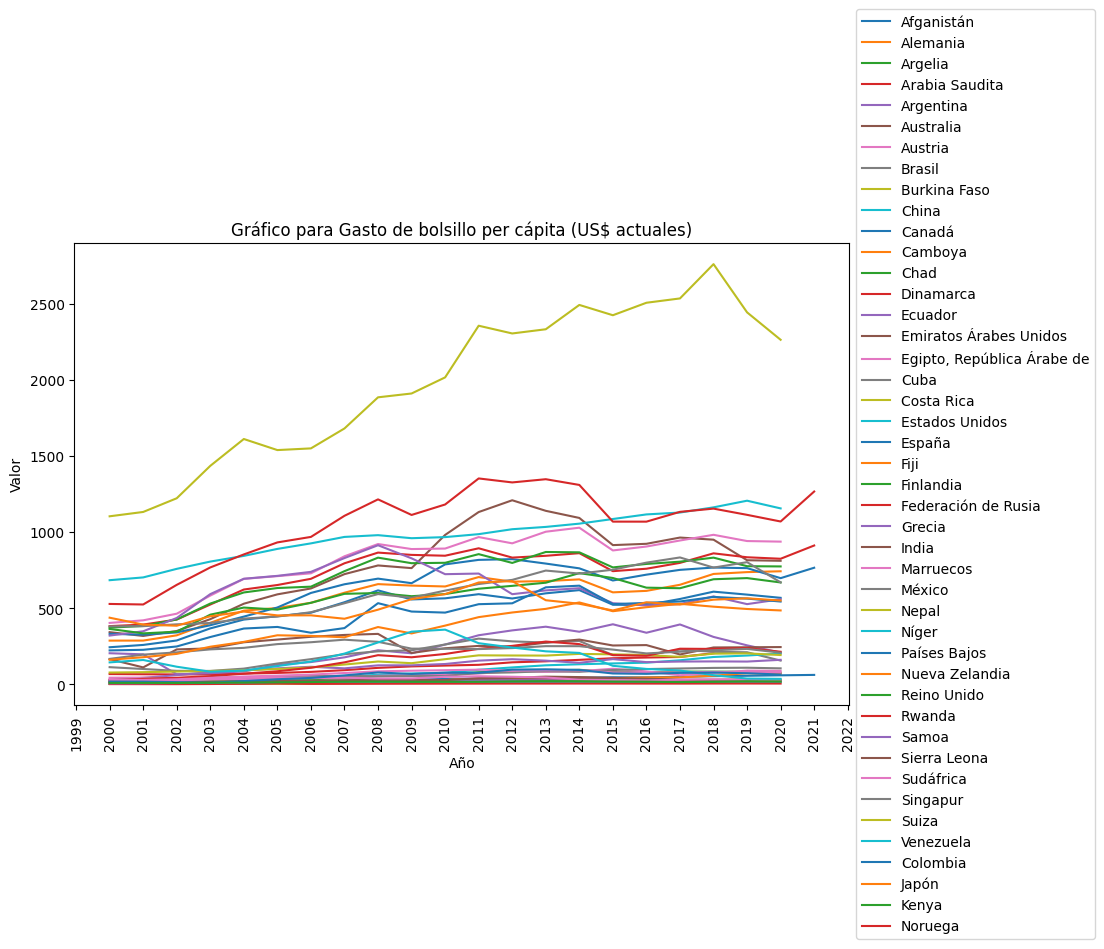

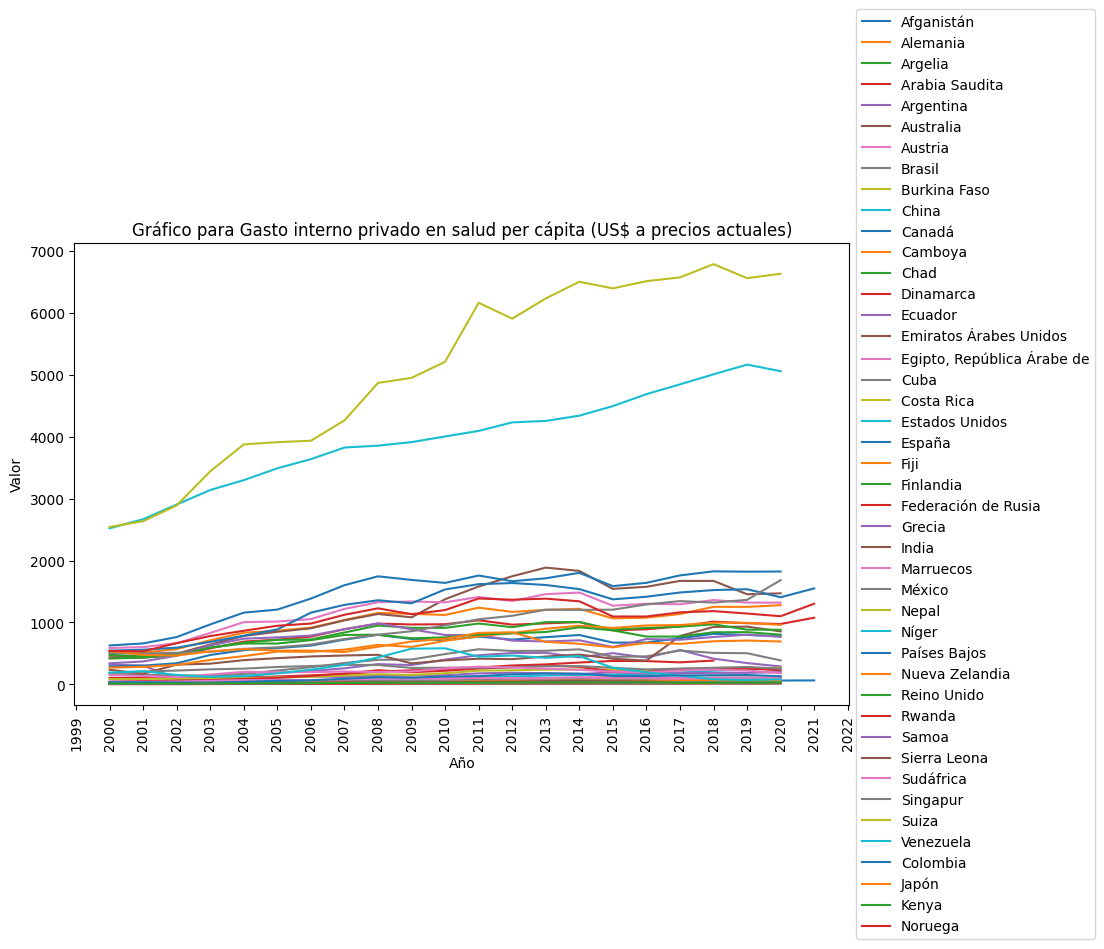

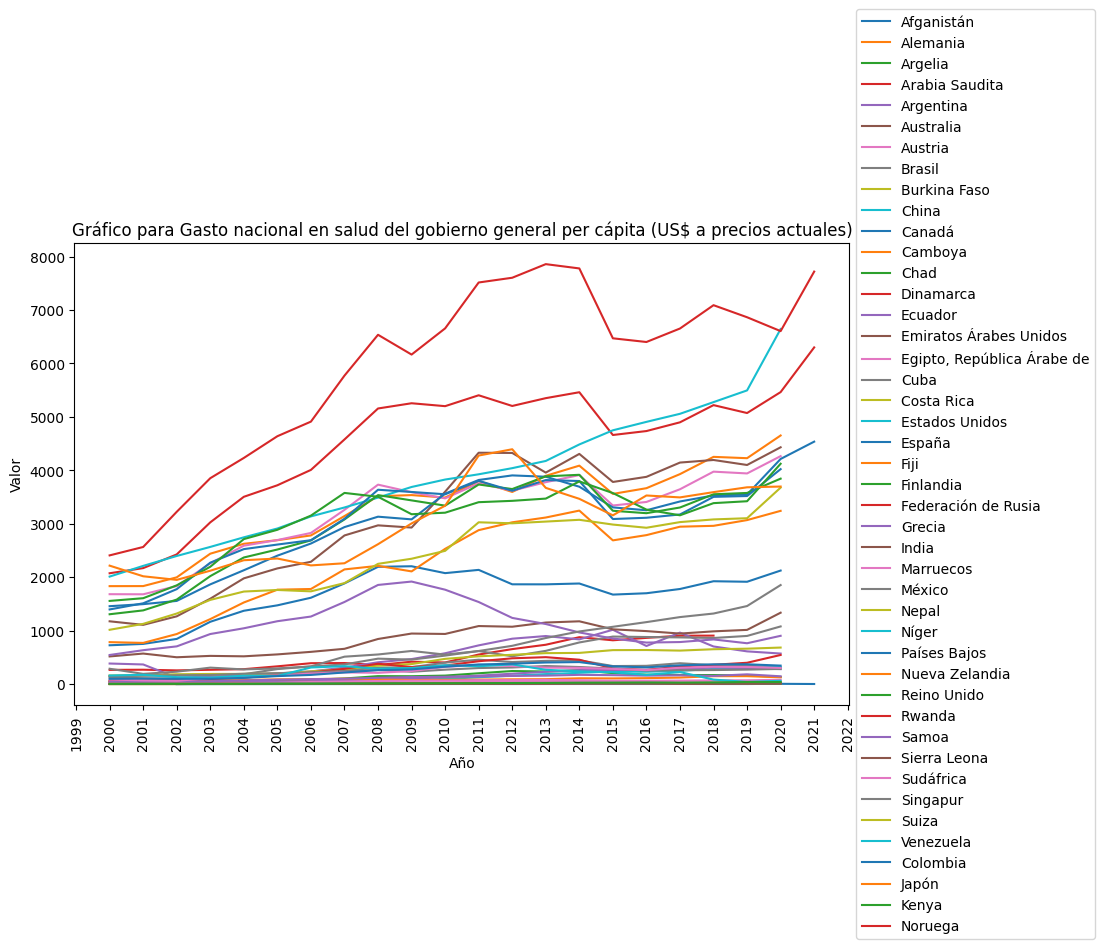

In [13]:
# Iterar sobre los dataframes
for nombre_grupo, dataframe in dataframes_por_grupo.items():
    # Obtener la lista de columnas para graficar (años)
    columnas_años = dataframe.columns[4:]
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.title(f'Gráfico para {nombre_grupo}')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    
    # Iterar a través de las filas (paises)
    for i in range(len(dataframe)):
        # Obtener los valores (suponiendo que los valores comienzan en la cuarta columna)
        valores = dataframe.iloc[i, 4:]
        plt.plot(columnas_años, valores, label=dataframe.iloc[i, 0])  # El nombre del país está en la primera columna
    
    # Mostrar leyenda y gráfico
    # Posicionar la leyenda afuera del gráfico
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Rotar las etiquetas del eje x a 90 grados
    plt.xticks(rotation=90)
    plt.show()
